In [1]:
import pandas as pd
from pprint import pprint
import webbrowser
import random 

#read in data
filepath = "Result_combined.csv"
roberta = pd.read_csv(filepath, sep="\t") 
roberta.columns = ["index"] + list(roberta.columns)[1:] #place index first for easy tracking

#minimal processing
roberta = roberta[~roberta.text.str.startswith("RT")] #remove retweets, many duplicates and non-original content
roberta['text'] = roberta.text.apply(lambda x: x + "  ") #add space to text, allows easy URL access
roberta = roberta.drop(columns=['emotions', 'trust']) #Raf noted Trust is not meaningful, emotions list field is hard to manage

#add new fields to update
roberta['main_emotion'] = ""
roberta['label'] = ""

roberta.head()

,index,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,text,neg,neu,pos,compound,main_emotion,label
0,0,0,0,0,0,0,0,0,0,0,0,"17/3/21 The Pavilion, inkpen and watercolour s...",0.000,1.000,0.000,0.0000,,
12,12,0,0,0,0,1,0,1,0,0,0,Got jabbed today! ✅ 💉 🥊 🦠 vaccination for the ...,0.000,0.838,0.162,0.5399,,
35,35,1,0,0,0,0,0,0,0,0,0,The Time of Corona_ COVID-19 Vaccine Suspended...,0.205,0.795,0.000,-0.4767,,
49,49,0,1,0,0,0,0,0,0,0,0,"Tracker in place! Looking forward to my 1:100,...",0.000,0.867,0.133,0.3164,,
52,52,1,0,0,0,0,0,0,0,0,0,The #EU is full of #clots #AstraZeneca #Covid...,0.000,1.000,0.000,0.0000,,


In [2]:
len(roberta)

405983

In [3]:
dicts = roberta.to_dict(orient='records') #convert dataset to list of dictionaries

dicts = dicts[200001:300000] #UPDATE THIS FOR YOUR PERSONAL RANGE
#Kip 0-100k
#Arshiya 100k-200k
#David 200k-300k
#Tiger 300k-400k

dictlen = len(dicts) #print number of samples
dictlen

99999

In [14]:
counter = 129 #start at this progress index

In [44]:
randi = random.randint(1, dictlen) #generate random index
print(f"you're reviewing tweet # {counter}\n\n") #print out progress

print(",\n") #add space for easier copy/paste
counter += 1 #increment counter
nextid = dicts[randi] #grab next random sample

#get link if existing and open in new tab
tok = nextid['text'].split(" ") 
tok = [x for x in tok if "http" in x]
if tok:
    webbrowser.open(tok[-1])
    
nextid #print out current tweet

#surprise, sadness, fear, joy

you're reviewing tweet # 154


,



{'index': 818185,
 'anger': 0,
 'anticipation': 1,
 'disgust': 0,
 'fear': 0,
 'joy': 1,
 'love': 0,
 'optimism': 0,
 'pessimism': 0,
 'sadness': 0,
 'surprise': 0,
 'text': 'Scientists found fragments of RNA which they ASSUMED was covid. Then using IN SILICO method a computer filled in th… https://t.co/zs0RqVCJii  ',
 'neg': 0.0,
 'neu': 1.0,
 'pos': 0.0,
 'compound': 0.0,
 'main_emotion': '',
 'label': ''}

In [45]:
import json 
import ast

with open("manual_coding_cx2rx.txt", encoding="utf-8-sig") as f:
    txt = f.read()
    
txt = ast.literal_eval(txt)
df = pd.DataFrame(txt)

In [46]:
len(df)

150

<AxesSubplot:>

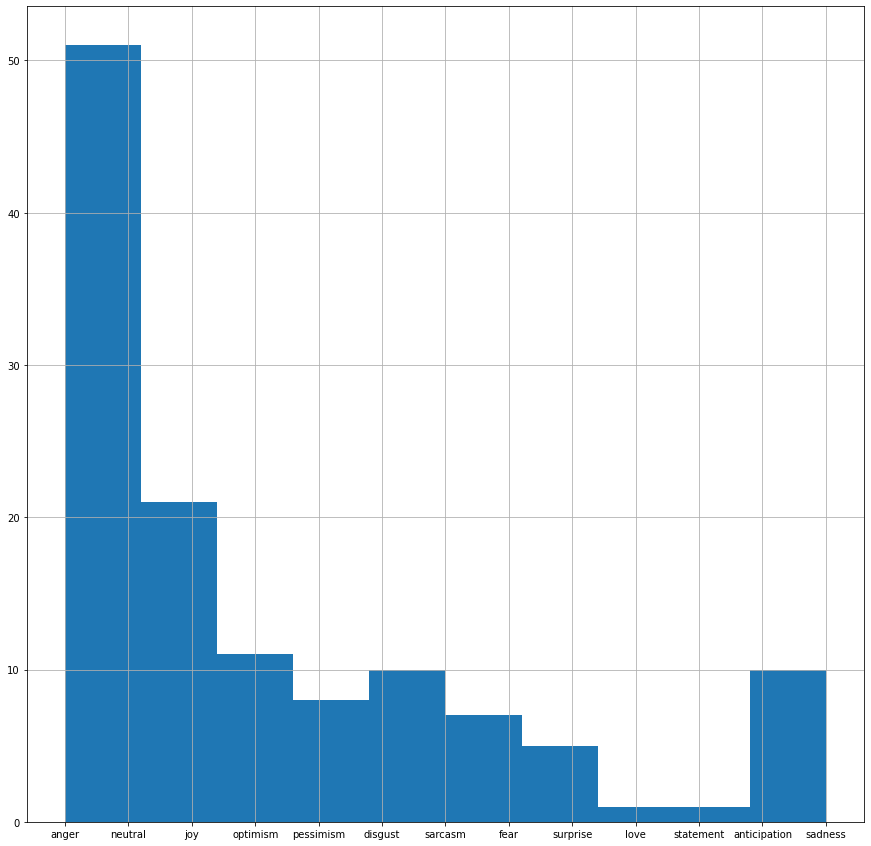

In [40]:
df.main_emotion.hist(figsize=(15,15))